Data Preprocessing

In [108]:
import pandas as pd
import numpy as np
import itertools as it
import spacy
from spacy.lang.hi import Hindi
import regex as re
nlp_hi = Hindi()


In [109]:
extended_stop_words = ['जी','श्री','|','l','श्रीमती','RT']
for stopword in extended_stop_words:
    lexeme = nlp_hi.vocab[stopword]
    lexeme.is_stop = True

In [110]:
def preprocessing_hi(text_hi):
  tweet_hi = []
  tokenized_text = nlp_hi(text_hi)
  for token in tokenized_text:
    if(token.text!='\n\n'
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and not token.like_email
        and not token.is_digit
        and not token.is_quote
        and (re.search(r'@\S+',token.text) is None)
        and not token.like_url):
      tweet_hi.append(token.text)


  tweet = ' '.join([token  for token in tweet_hi])
  return tweet

In [111]:
df=pd.read_csv('tweetSet1500.csv')
x=df['Tweets'].tolist()

In [112]:
p=[]
for tweets in x:
  p.append(preprocessing_hi(tweets))

In [113]:
! pip install demoji
import demoji
demoji.download_codes()
pt=[]
for tweet in p:
  tweet=tweet.replace('\\n','')
  tweet=tweet.replace('#','')
  tweet=demoji.replace(tweet,'')
  pt.append(tweet)

<ipython-input-113-210ebffc91d4>:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [114]:
xa=np.array(pt)
print(xa.shape)

(1500,)


In [115]:
y=[]
for tweet in df['Sentiment']:
  if(tweet == 'positive'):
    y.append(1)
  if(tweet == 'negative'):
    y.append(-1)
  if(tweet == 'neutral'):
    y.append(0)

In [116]:
ya=np.array(y)
print(ya.shape)

(1500,)


In [117]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

Naive Bayes Classifier

In [118]:
from sklearn.model_selection import train_test_split
xa_train,xa_test,ya_train,ya_test=train_test_split(xa,ya,test_size=0.3,random_state=3) #3
print(xa_train.shape)
print(xa_test.shape)
print(ya_train.shape)
print(ya_test.shape)

(1050,)
(450,)
(1050,)
(450,)


In [119]:
tokenizer = Tokenizer(num_words=None,split=' ',lower=True)
tokenizer.fit_on_texts(xa_train)
integer_sentences_train = tokenizer.texts_to_sequences(xa_train)
data_train = pad_sequences(integer_sentences_train,padding='post',truncating='post',value=0.)
print(data_train[0])
print(data_train.shape)

[ 217 2349 1390 1390  154  154  312  955 2350    1   24 2351  467 1391
 2352 2353  111 1392  313  218  314 2354  956 1393 2355  468 2356   28
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
(1050, 42)


In [120]:
tokenizer.fit_on_texts(xa_test)
integer_sentences_test = tokenizer.texts_to_sequences(xa_test)
data_test = pad_sequences(integer_sentences_test,padding='post',truncating='post',value=0.)
print(data_test[0])
print(data_test.shape)

[1049  835  223   33  690 1028 6606 6607   95  941 1389   39   41  433
 1025  826   14    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
(450, 40)


In [121]:
# from google.colab import drive
# drive.mount('/content/drive')

In [122]:
data_train = sequence.pad_sequences(data_train, maxlen=30, dtype='float32')
data_test = sequence.pad_sequences(data_test, maxlen=30, dtype='float32')
print(data_train.shape)
print(data_test.shape)

(1050, 30)
(450, 30)


In [123]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(data_train, ya_train)
y_pred = clf.predict(data_test)
from sklearn import metrics
acc=metrics.accuracy_score(ya_test, y_pred)*100
print("Accuracy:",acc)

Accuracy: 48.0


In [124]:
# with open(model_pkl_file, 'rb') as file:
#     model = pickle.load(file)

In [125]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ya_test, y_pred, labels=[1,-1 ,0])

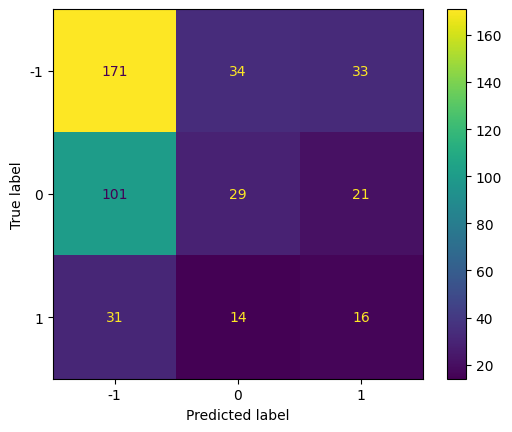

In [126]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [127]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "nb_model" + str(acc) + ".pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(clf, file)

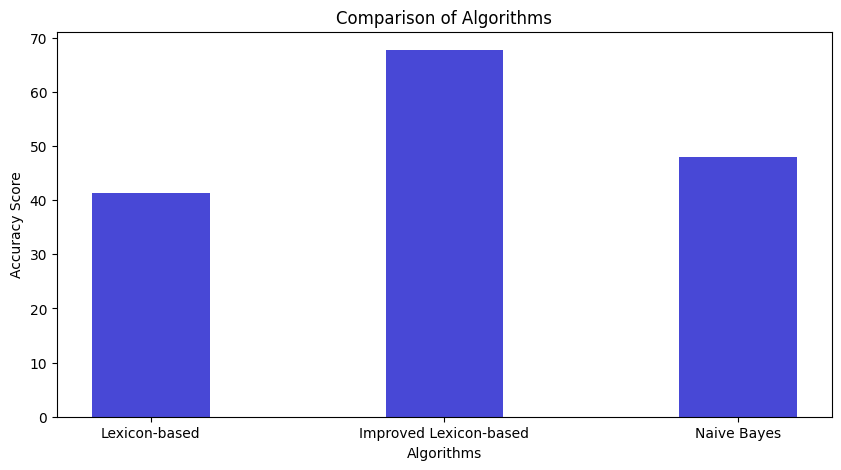

In [135]:

import numpy as np
import matplotlib.pyplot as plt
color = (0.1, # redness
         0.1, # greenness
         0.8, # blueness
         0.8 # transparency
         )
# creating the dataset
data = {'Lexicon-based':41.4, 'Improved Lexicon-based':67.73, 'Naive Bayes':48}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color =color,
        width = 0.4)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Algorithms")
plt.show()

In [132]:
df_x = pd.DataFrame(xa_test, columns=['Preprocessed_Tweets'])
df_y_test = pd.DataFrame(ya_test, columns=['Actual_Sentiment'])
df__y_pred = pd.DataFrame(y_pred, columns=['Predicted_Sentiment'])
df3 = pd.concat([df_x,df__y_pred,df_y_test], axis=1)
df4=df3.sample(n=10)
df4

,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
438,बीजेपी शासित बिहार_सरकार ज्यादा ट्वीट ईमेल भेज...,-1,-1
205,क्या गाँधी महात्मा बापू कहना राष्ट्र अपमान नही...,1,-1
208,लोग कह श्मसान भीड़ दिखा असुविधा दिखाते बीजेपी ...,1,-1
272,कश्मीर तबाही सात दिन बाढ़ तीन मंत्री लापता डूब...,1,-1
426,मैट्रिक पास अंधभक्तों ज्ञान हेडगवार जन्मदिन ...,0,-1
432,राम नवमी हार्दिक शुभकामनाएँ प्रभु राम कृपा सदै...,1,1
130,वाह क्या बात,1,1
262,"दिन Congress संपर्क आए Modi सलाह दी थी,समझ गये...",1,0
407,गाड़ी बैठे अकेले आदमी corona हैपर मोदी अमित शा...,1,1
124,शुक्रिया,1,1


In [26]:
df4

,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
105,सरकार राजनीति व्यस्त आम आदमी मर बिना ट्रीटमेंट...,-1,1
434,निराश करती सिमरन,1,-1
339,"राम जिनका नाम अयोध्या जिनका धाम है,ऐसे रघुनंदन...",0,-1
379,पूर्व कप्तान बोले धोनी रवींद्र जडेजा मिलनी चाह...,-1,1
312,राम मुश्किल लगता वो बचा पायेंगे।।बीजेपी कहती राम,1,1
428,बीजेपी हर राज्य डंके चोट कह रही CAA लागू करेंग...,0,1
6,दीम संगीत छोड़ दें लेष मात्र प्रभाव छोड़ती,1,-1
110,संपादक भेजी कविता समय छपने दर्द लेखक जान,1,1
36,आदत मोदी सजेशन लेना चला खुदका दिमाग चलाने मोदी...,1,-1
257,राम जिनका नाम अयोध्या जिनका धाम रघुनंदन प्रणाम...,-1,1
